# Assignment - 1 | Part - A
#####   *Submitted By: Ashish Aggarwal*

For this assignment the dataset used is related to white variant of the Portuguese "Vinho Verde" wine 



##### Source:

>URL: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

>Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez 
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal 
@2009


In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

winedata = pd.read_csv("VinhoVerde_WhiteWineQuality.csv", sep=';')
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Above is some sample data from the dataset displaying the first 5 rows. The dataset is in .csv format loaded using *pandas* dataframe API.


Now we will check if there are any missing values in this dataset.

In [98]:
winedata.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values but we need to know if there are any inappropriate values in the dataset, and for that we need to know more about the dataset, so we will read the summary of the data to check if the dataset has any unusual stats.

In [99]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The above output shows us that there is only _citric acid_ column who has a minimum value 0, and it seems possible for a wine to have citric acid level as 0, therefore the dataset seems to have no inappropriate values. To confirm this notion we will find out how many values of _citric acid_ column are 0.

In [100]:
print((winedata[['citric acid']] == 0).sum())

citric acid    19
dtype: int64


The above output shows that _citric acid_ column has 19 rows marked 0, which seems neglegible with respect to the dataset. Therefore the dataset has no inappropriate values. 

Now we will look at the variable - _quality_ and derive a conclusion from it about the quality of the wines in the dataset.

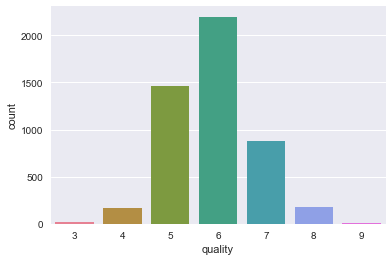

In [14]:
sns.countplot(x="quality", data=winedata, palette="husl")

The above bar graph depicts that the dataset consists of mostly average quality wines between the quality ratings of 5 to 7. 

Now, we will see if any of the column represent correlation with the quality parameter, and how different variables affect the quality of the wine, along with each column's seperate distribution pattern.

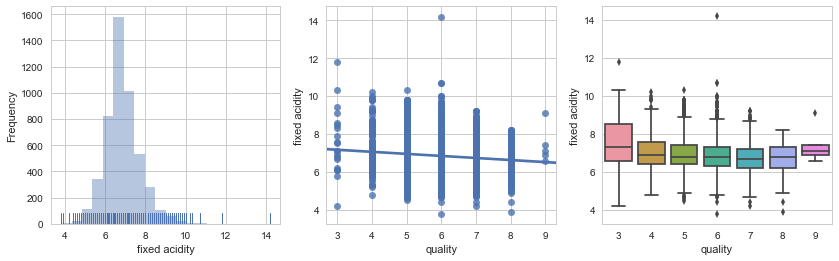

In [15]:
#Set the plot background
sns.set_style('whitegrid')

#define subplots with size
fig, axs = plt.subplots(1,3,figsize=(14, 4))
#bind each plot to a subplot
sns.distplot(winedata['fixed acidity'], bins=20, kde=False, rug=True, label="Frequency", ax=axs[0])
sns.regplot(x="quality", y="fixed acidity", data=winedata, ax=axs[1])
sns.boxplot(x="quality", y="fixed acidity", data=winedata, ax=axs[2])
#set y label for first graph
axs[0].set_ylabel('Frequency')

The above histogram plot shows that majority of values corressponding to _fixed acidity_ column are in the range 6 to 8.
The scatter plot shows the correlation between quality and fixed acidity, this graph seems to have a negative slope therefore as the fixed acidity decreases quality tends to increase. However, it may be noted that magnitude of the negative slope is less and given the less no. of high quality data samples in the dataset, this slope may just be an estimation. 

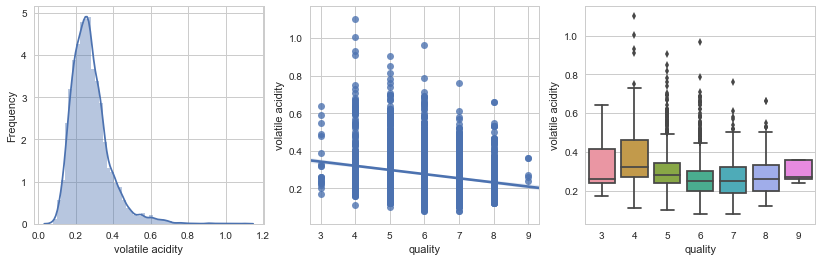

In [16]:
fig, axs = plt.subplots(1,3,figsize=(14, 4))

sns.distplot(winedata['volatile acidity'], ax=axs[0])
sns.regplot(x="quality", y="volatile acidity", data=winedata, ax=axs[1])
sns.boxplot(x="quality", y="volatile acidity", data=winedata, ax=axs[2])

axs[0].set_ylabel('Frequency')

The above density plot shows that majority of values corressponding to _volatile acidity_ column are in the range 0.1 to 0.4.
The scatter plot shows the correlation between quality and volatile acidity, this graph seems to have a negative slope, therefore as the volatile acidity decreases quality tends to increase.

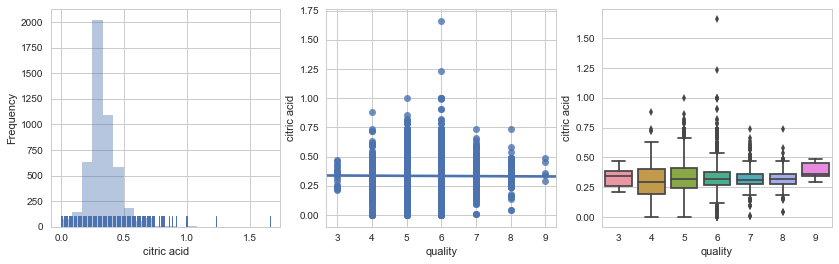

In [17]:
fig, axs = plt.subplots(1,3,figsize=(14, 4))

sns.distplot(winedata['citric acid'], bins=20, kde=False, rug=True, ax=axs[0])
sns.regplot(x="quality", y="citric acid", data=winedata, ax=axs[1])
sns.boxplot(x="quality", y="citric acid", data=winedata, ax=axs[2])

axs[0].set_ylabel('Frequency')

The above histogram plot shows that majority of values corressponding to _citric acid_ column are in the range 0.25 to 0.50.
The scatter plot shows the correlation between quality and citric acid, this graph seems to have a 0 slope, therefore citric acid tends to have no effect on quality.

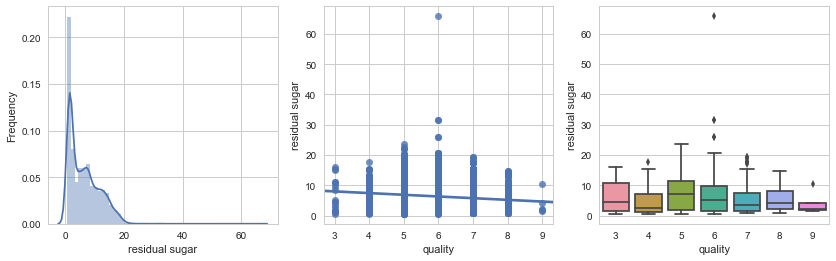

In [18]:
fig, axs = plt.subplots(1,3,figsize=(14, 4))

sns.distplot(winedata['residual sugar'], ax=axs[0])
sns.regplot(x="quality", y="residual sugar", data=winedata, ax=axs[1])
sns.boxplot(x="quality", y="residual sugar", data=winedata, ax=axs[2])

axs[0].set_ylabel('Frequency')

The above density plot shows that majority of values corressponding to _residual sugar_ column are in the range 0 to 5.
The scatter plot shows the correlation between quality and residual sugar, this graph seems to have a negative slope, therefore as the residual sugar decreases quality tends to increase, but given the less no. of low and high quality data samples in the dataset, this may just be an estimation.

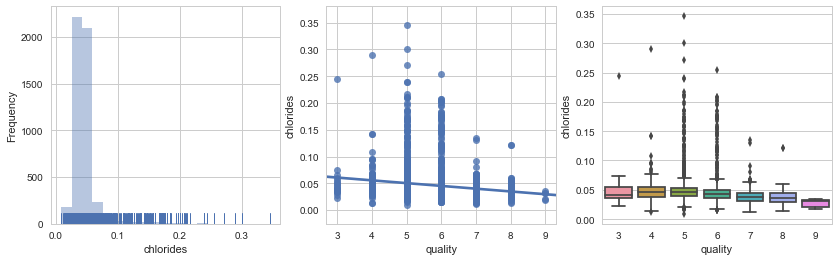

In [19]:
fig, axs = plt.subplots(1,3,figsize=(14, 4))

sns.distplot(winedata['chlorides'], bins=20, kde=False, rug=True, ax=axs[0])
sns.regplot(x="quality", y="chlorides", data=winedata, ax=axs[1])
sns.boxplot(x="quality", y="chlorides", data=winedata, ax=axs[2])

axs[0].set_ylabel('Frequency')

The above histogram plot shows that majority of values corressponding to _chlorides_ column are in the range 0.02 to 0.06.
The scatter plot shows the correlation between quality and chlorides, this graph seems to have a negative slope, therefore as the chlorides level decreases quality tends to increase, but given the less no. of low and high quality data samples in the dataset, this may just be an estimation.

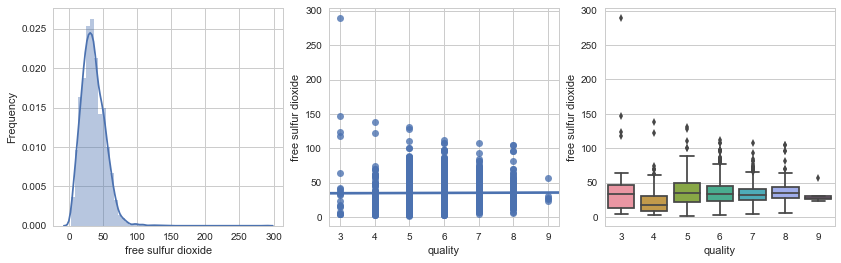

In [20]:
fig, axs = plt.subplots(1,3,figsize=(14, 4))

sns.distplot(winedata['free sulfur dioxide'], ax=axs[0])
sns.regplot(x="quality", y="free sulfur dioxide", data=winedata, ax=axs[1])
sns.boxplot(x="quality", y="free sulfur dioxide", data=winedata, ax=axs[2])

axs[0].set_ylabel('Frequency')

The above density plot shows that majority of values corressponding to _free sulphur dioxide_ column are in the range 25 to 55.
The scatter plot shows the correlation between quality and free sulphur dioxide, this graph seems to have a 0 slope, therefore free sulphur dioxide tends to have no effect on quality.

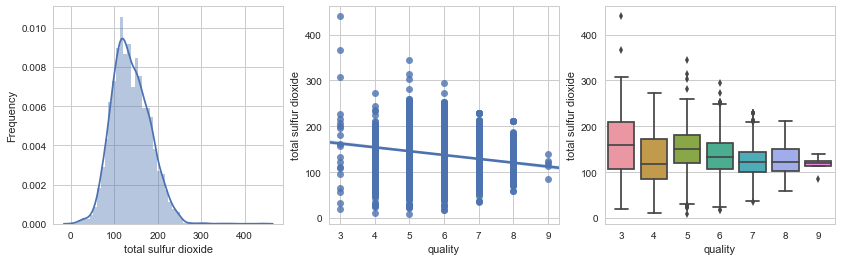

In [21]:
fig, axs = plt.subplots(1,3,figsize=(14, 4))

sns.distplot(winedata['total sulfur dioxide'], ax=axs[0])
sns.regplot(x="quality", y="total sulfur dioxide", data=winedata, ax=axs[1])
sns.boxplot(x="quality", y="total sulfur dioxide", data=winedata, ax=axs[2])

axs[0].set_ylabel('Frequency')

The above density plot shows that majority of values corressponding to _total sulphur dioxide_ column are in the range 25 to 55. The scatter plot shows the correlation between quality and total sulphur dioxide, this graph seems to have a negative slope, therefore as the total sulphur dioxide level decreases quality tends to increase, but given the less no. of low and high quality data samples in the dataset, this may just be an estimation.

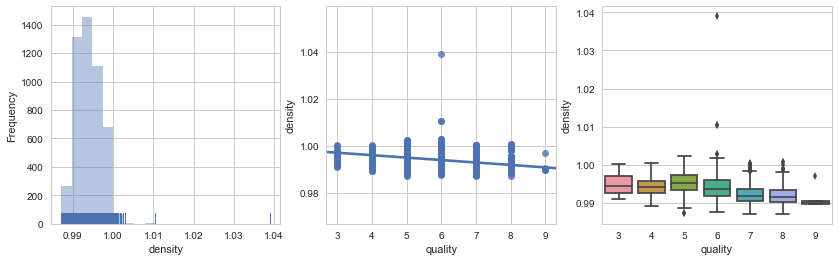

In [22]:
fig, axs = plt.subplots(1,3,figsize=(14, 4))

sns.distplot(winedata['density'], bins=20, kde=False, rug=True, ax=axs[0])
sns.regplot(x="quality", y="density", data=winedata, ax=axs[1])
sns.boxplot(x="quality", y="density", data=winedata, ax=axs[2])

axs[0].set_ylabel('Frequency')

The above histogram plot shows that majority of values corressponding to _density_ column are in the range 0.992 to 0.998.
The scatter plot shows the correlation between quality and density, this graph seems to have a negative slope, therefore as the density level decreases quality tends to increase, but given the less no. of low and high quality data samples in the dataset, this may just be an estimation.

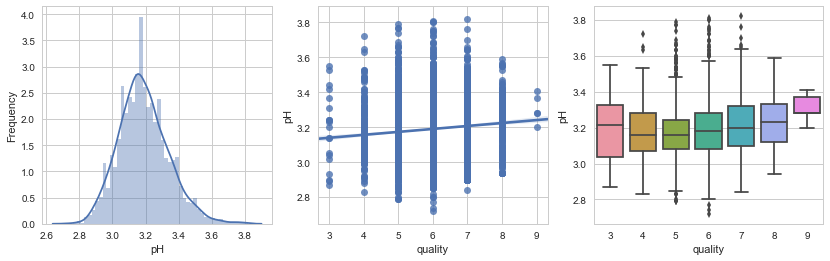

In [23]:
fig, axs = plt.subplots(1,3,figsize=(14, 4))

sns.distplot(winedata['pH'], ax=axs[0])
sns.regplot(x="quality", y="pH", data=winedata, ax=axs[1])
sns.boxplot(x="quality", y="pH", data=winedata, ax=axs[2])

axs[0].set_ylabel('Frequency')

The above density plot shows a steep curve from 3.1 to 3.3, therefore most of the values seems to exist in this range for _pH_ column.
The scatter plot shows the correlation between quality and pH level, this graph seems to have a positive slope, therefore as the pH level increases the quality of the wine increase. However, it may be noted that magnitude of the positive slope is less and given the lack of high and low quality data samples in the dataset, this slope may just be an estimation. 

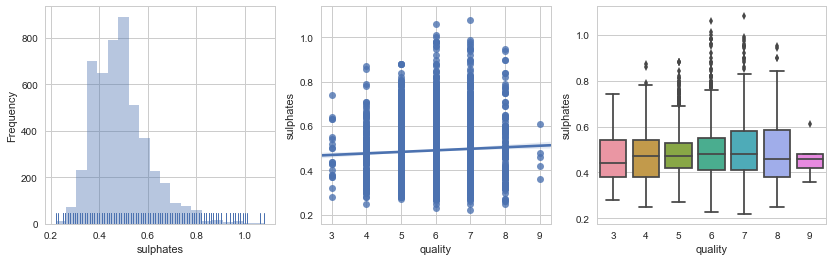

In [24]:
fig, axs = plt.subplots(1,3,figsize=(14, 4))

sns.distplot(winedata['sulphates'], bins=20, kde=False, rug=True, ax=axs[0])
sns.regplot(x="quality", y="sulphates", data=winedata, ax=axs[1])
sns.boxplot(x="quality", y="sulphates", data=winedata, ax=axs[2])

axs[0].set_ylabel('Frequency')

The above histogram displays a comparatively widespread plot, but majorly concentrated between 0.39 to 0.57.
The scatter plot shows the correlation between quality and suphates level, this graph seems to have a positive slope, therefore as the suphates level increases the quality of the wine increase. However, it may be noted that magnitude of the positive slope is negligible and given the lack of high and low quality data samples in the dataset, this slope may just be an estimation. 

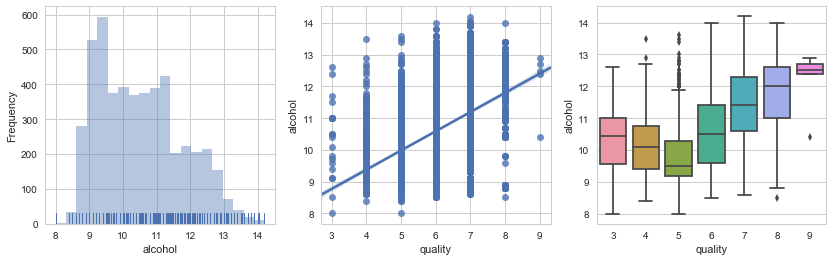

In [26]:
fig, axs = plt.subplots(1,3,figsize=(14, 4))

sns.distplot(winedata['alcohol'], bins=20, kde=False, rug=True, ax=axs[0])
sns.regplot(x="quality", y="alcohol", data=winedata, ax=axs[1])
sns.boxplot(x="quality", y="alcohol", data=winedata, ax=axs[2])

axs[0].set_ylabel('Frequency')

The above histogram displays a widespread plot, unevenly distributed across the _alcohol_ level 8.5 to 13.
The scatter plot shows the correlation between quality and alcohol level, this graph seems to have a positive slope, therefore as the alcohol level increases the quality of the wine increase. However, it may be noted that due to the lack of high and low quality data samples in the dataset, this slope may just be an estimation. 

In [28]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


All the above statistics and plots describes that the dataset consists of mostly average data samples, and the correlated parameters include: fixed acidity, volatile acidity, residual sugar, chlorides, total sulfur dioxide, density,pH, alcohol level.